In [63]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from time import sleep
from random import randint
from selenium import webdriver
import os

In [66]:
#Loop to go over all pages
pages = np.arange(1, 101, 1)
review_with_title = []

for page in pages:
    page= "https://www.tripadvisor.com/Attraction_Review-g28970-d2478701-Reviews-or{}0-Capital_Bikeshare-Washington_DC_District_of_Columbia.html".format(str(page))
    driver = webdriver.Chrome()
    driver.get(page)  
    sleep(randint(2,10))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    for name in soup.findAll('span',{'class':'yCeTE'}):
        review_with_title.append(name.text.strip())

# https://deepnote.com/@dennis-dfa8/Web-Scraping-TripAdvisor-Hotels-2cf0d52d-6d4a-4365-a12e-d31de4aa1f20
# https://medium.com/p/625ccd3d67fa

In [67]:
# separamos el título y la review, ya que estaban en el mismo elemento de HTML
title = []
review = []
for i in range(0, len(review_with_title)):
    if i % 2:
        review.append(review_with_title[i])
    else :
        title.append(review_with_title[i])

# https://www.geeksforgeeks.org/python-separate-odd-and-even-index-elements/

In [68]:
# Create the dictionary.
dicto = {'Review title':title,'Review':review}
# Create the dataframe.
cbk_reviews = pd.DataFrame.from_dict(dicto)
cbk_reviews.head(10)

,Review title,Review
0,"Bikes were fine, map was HORRIBLE",Riding a bike on the mall was a lot of fun. Th...
1,"Good bikes, good service",We used the service three times during our sta...
2,System works great once you figure it out!,Capital Bikeshare day passWe (family of 3) did...
3,Capital Bikeshare 2 Day to Explore The Mall,I had a loft of trepidation using Capital Bike...
4,"Went for a short trip and docked bike, still c...",Be careful with this service. You can use the ...
5,Good concept; horrible execution,The concept is great and there are docking sta...
6,ABSOLUTE RIP OFF,COMPLETE RIP-OFF. My husband and I rented th...
7,Trip to dc,Do not use! They advertise $8 for 24 hours. I ...
8,"Dont !! You will loose money , careful on you...",Worst for everything. 24 HRs rental service i...
9,Terrible,So apparently the bike wasn’t docked properly ...


In [69]:
#remove numbers
cbk_reviews['Review'] = cbk_reviews['Review'].str.replace('\d+', '') 
#all to lowercase
cbk_reviews['Review'] = cbk_reviews['Review'].str.lower()
#remove windows new line
cbk_reviews['Review'] = cbk_reviews['Review'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
cbk_reviews['Review'] = cbk_reviews['Review'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
cbk_reviews['Review'] = cbk_reviews['Review'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
cbk_reviews['Review'] = cbk_reviews['Review'].str.replace('\s+', ' ')

C:\Users\Carlos\AppData\Local\Temp\ipykernel_18436\2964484995.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Carlos\AppData\Local\Temp\ipykernel_18436\2964484995.py:12: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Carlos\AppData\Local\Temp\ipykernel_18436\2964484995.py:14: FutureWarning:

The default value of regex will change from True to False in a future version.



In [74]:
# Creamos contaeo de palabras
texts = cbk_reviews['Review'].tolist()
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.drop([5], axis=0, inplace=True) # elimino la palabra 'bikes' ya que aparece 'bike' antes
cvec_df.drop([309], axis=0, inplace=True) # elimino la palabra 'stations' ya que aparece 'station' antes
cvec_df.head(30)

,words,counts
1,bike,803
63,minutes,288
316,get,284
117,day,261
45,time,230
84,one,202
61,around,185
145,dc,185
245,way,181
191,station,177


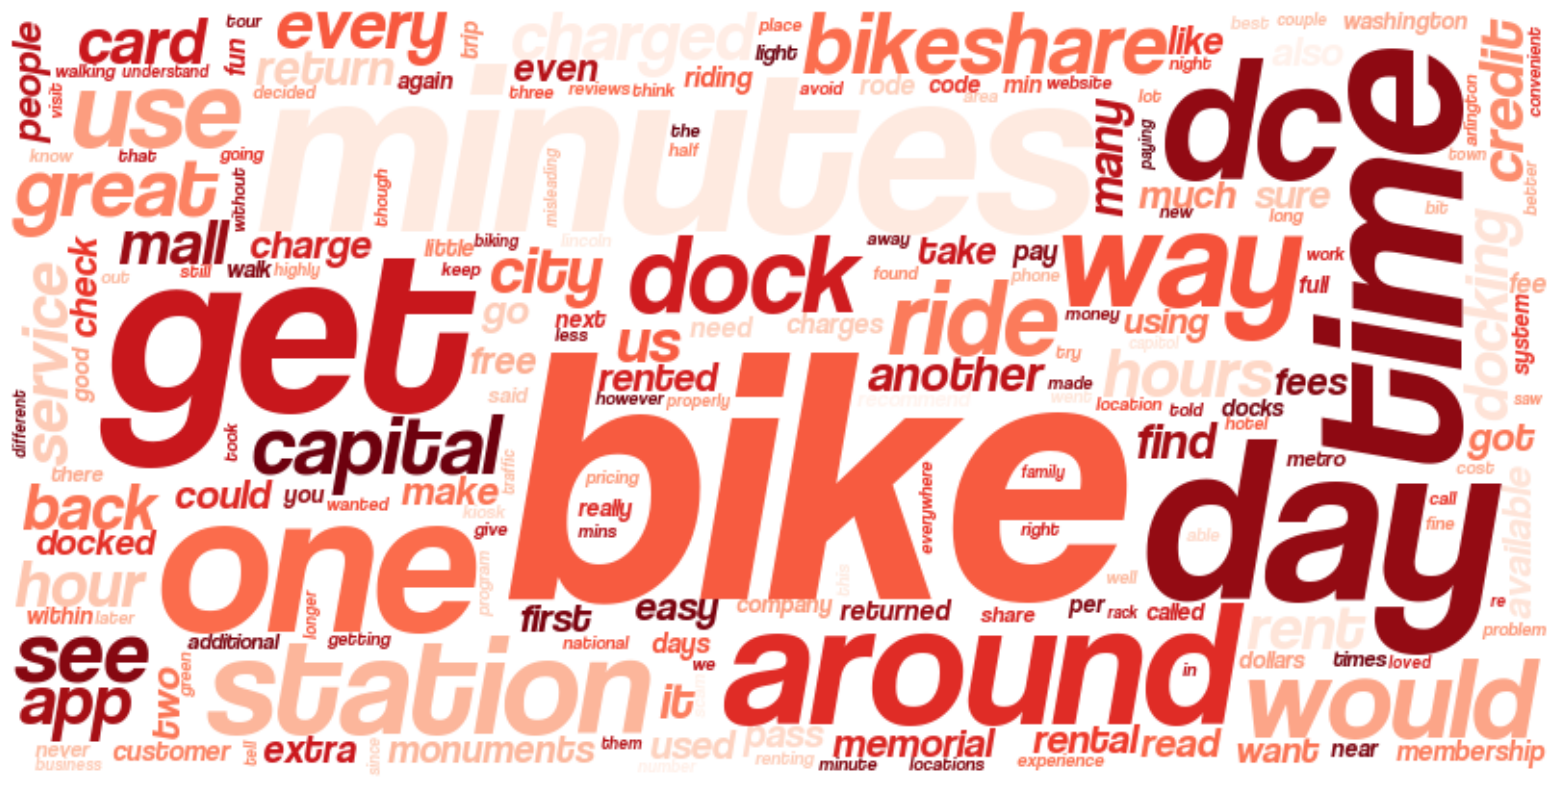

In [76]:
os.chdir('coolvetica_font/')
# Leo el tipo de letra descargado
font_path = r'coolvetica-rg-it.ttf'

cvec_dict = dict(zip(cvec_df['words'], cvec_df['counts']))

wordcloud = WordCloud(font_path = font_path, width=800, height=400, collocations = False, background_color = 'white', colormap = 'Reds', random_state = 128)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)

plt.figure(figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()